# Information Theory
### From scratch

## Imports

In [1]:
from utilities.std_imports import *
from math import log2
import math
from scipy.stats import entropy

## 1. Information content
  
The log probability of the event  

$ \large I(E) = -\log[P(E)] $

- A fair coin : &emsp; $ P(x) = 1/2 \quad\; I(x) = -\log_2 P(x) = -\log_2 1/2 = 1 $
- 2 fair coins: &emsp;  $ P(x) = 1/4 \quad\; I(x) = -\log_2 P(x) = -\log_2 1/4 = 2 $ 
- A fair dice : &emsp; $ P(x) = 1/6 \quad\; I(x) = -\log_2 P(x) = -\log_2 1/6 \approx 2.58 $
- One hot dice : &emsp; $ P(x) = 1 \quad\;  I(x) = -\log_2 P(x) = -\log_2 1 = 0 \;\;\; or \;\; -\log_2 0 = \infty $


In [2]:
P = [1/2, 1/4, 1/6, 1]
I = []
for i in range(len(P)): 
    I.append(-log2(P[i])) 
    print('Probability = ', '{0:.2f}'.format(P[i])  , 'information = ', '{0:.2f}'.format(I[i]), 'bits')

Probability =  0.50 information =  1.00 bits
Probability =  0.25 information =  2.00 bits
Probability =  0.17 information =  2.58 bits
Probability =  1.00 information =  -0.00 bits


## 2. Shannon entropy
  
The expectation of the information content 

$ \large H(x) = E[(I(x)] = \sum_1^n{-P(X_i) \; log P(X_i) } $

In [3]:
n=6; p=1/6
h = -sum([p * log2(p) for _ in range(n)])
print(h)

2.584962500721156


## 3. Cross-entropy

H(P, Q) is the cross-entropy of Q from P, that is the average number of total bits to represent an event from Q instead of P.
  
$\large -\sum_{i=1}^n p_i . \log_2 q_i $  
  
For binary classification:

$\large -\sum_{i=1}^n p_i . \log_2 (1- p_i) $

In [4]:
def cross_entropy(p, q):
    return -sum( [p[i] * log2(q[i]) for i in range(len(p))])

#### Test:

P=1.000 Q=1.000


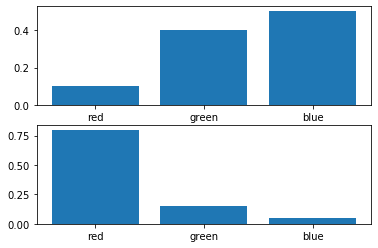

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


In [5]:
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))

# plot both distributions
plt.subplot(2,1,1)
plt.bar(events, p)
plt.subplot(2,1,2)
plt.bar(events, q)
plt.show()

# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

#### Using libraries: scipy

In [6]:
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
h = entropy(p, base=2)
print(h)

2.584962500721156


## 4. Mutual information

$ \large I(X,Y) = \sum_{y \in Y} \sum_{x \in X} P(x,y) \; log \frac{P(x,y)}{P(x) P(y)} = I(X, Y) = \frac{H(X) + H(Y) - H(X,Y)}{H(X) H(Y) } $

In [7]:
def mutual_information(x,y, mode="auto", normalized=False):
    x = np.asarray(x)
    y = np.asarray(y)
    H_x = entropy(x)
    H_y = entropy(y)
    H_xy = entropy(np.concatenate([x,y]))
    I_xy = H_x + H_y - H_xy
    return I_xy / (H_x*H_y)   

## Credits & Links

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
https://machinelearningmastery.com/what-is-information-entropy/
https://adventuresinmachinelearning.com/cross-entropy-kl-divergence/